In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *
import plotly.express as px
#from pymodulon.plotting import *
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from scipy.stats import spearmanr, pearsonr
import seaborn as sns

In [24]:
ica_data = load_json_model('../data/yarrowia2025_fixed.json')

In [25]:
o2_projects = ['O2_oscillation_0.05', 'O2_oscillation_0.2', 'O2_oscillation_0.1']

o2_samples = ica_data.sample_table[ica_data.sample_table['project'].isin(o2_projects)].copy(deep=False)

o2_samples

,File name,condition,project,reference_condition,Strain,Mode of operation,Media,Limitation,C-source,Growth rate,DO,pH,Temperature,Read1,Read2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_replicate_correlations
yl_101,PD019 A1 S02 #1,µ0.05_DO50,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,50,6,30,ylipolytic2025_repeat/PD017A3S072A_1.fq.gz,ylipolytic2025_repeat/PD017A3S072A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO50,True
yl_102,PD019 A1 S02 #2,µ0.05_DO50,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,50,6,30,ylipolytic2025_repeat/PD019A1S021A_1.fq.gz,ylipolytic2025_repeat/PD019A1S021A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO50,True
yl_105,PD019 A1 S04 #1,µ0.05_DO10,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,10,6,30,ylipolytic2025_repeat/PD019A1S032A_1.fq.gz,ylipolytic2025_repeat/PD019A1S032A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO10,True
yl_106,PD019 A1 S04 #2,µ0.05_DO10,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,10,6,30,ylipolytic2025_repeat/PD019A1S041A_1.fq.gz,ylipolytic2025_repeat/PD019A1S041A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO10,True
yl_107,PD019 A1 S05 #1,µ0.05_DO5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,5,6,30,ylipolytic2025_repeat/PD019A1S042A_1.fq.gz,ylipolytic2025_repeat/PD019A1S042A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO5,True
yl_108,PD019 A1 S05 #2,µ0.05_DO5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,5,6,30,ylipolytic2025_repeat/PD019A1S051A_1.fq.gz,ylipolytic2025_repeat/PD019A1S051A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO5,True
yl_109,PD019 A1 S06 #1,µ0.05_DO2.5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,2.5,6,30,ylipolytic2025_repeat/PD019A1S052A_1.fq.gz,ylipolytic2025_repeat/PD019A1S052A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO2.5,True
yl_110,PD019 A1 S06 #2,µ0.05_DO2.5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,2.5,6,30,ylipolytic2025_repeat/PD019A1S061A_1.fq.gz,ylipolytic2025_repeat/PD019A1S061A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO2.5,True
yl_111,PD019 A1 S07 #1,µ0.05_DO0,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,0,6,30,ylipolytic2025_repeat/PD019A1S062A_1.fq.gz,ylipolytic2025_repeat/PD019A1S062A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO0,True
yl_112,PD019 A1 S07 #2,µ0.05_DO0,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,0,6,30,ylipolytic2025_repeat/PD019A1S071A_1.fq.gz,ylipolytic2025_repeat/PD019A1S071A_2.fq.gz,True,True,True,O2_oscillation_0.05:µ0.05_DO0,True


In [26]:
list(set([w for w in ica_data.sample_table['project'] if 'O2_oscillation_' in w]))

['O2_oscillation_0.1', 'O2_oscillation_0.2', 'O2_oscillation_0.05']

In [27]:
def pca_scatter3(df, labels=None, scale=True, label_points=False,name='pca_plot',
                 palette='tab10', figsize=(12, 4), s=45, alpha=0.9):
    """
    PCA on a genes × samples table with a 3‑panel pairwise plot (PC1‑PC3).

    Parameters
    ----------
    df : pandas.DataFrame
        Rows = genes/features, Columns = samples/conditions.
    labels : list‑like or pandas.Series, optional
        A list/category for each column (same length/order as df.columns).
        • If `label_points` is False (default) they are used for *colours*.
        • If `label_points` is True they are drawn as *text* at each point.
    scale : bool, default True
        Standard‑scale each gene before PCA (zero mean, unit variance).
    label_points : bool, default False
        If True, annotate each point with the corresponding entry in `labels`.
        If False, unique entries in labels are mapped to colours with a legend.
    palette : str or sequence
        Matplotlib colour palette name or explicit colour list.
    figsize : tuple, default (12, 4)
        Overall figure size (three equal‑width panels).
    s : int or float, default 45
        Marker size for scatter points.
    alpha : float, default 0.9
        Marker transparency.

    Returns
    -------
    pca : sklearn.decomposition.PCA
        The fitted PCA object (for further inspection if needed).
    """
    # ---------- 1. prepare the data (samples as rows) ----------
    X = df.T.values                                       # (n_samples, n_genes)
    if scale:
        X = StandardScaler().fit_transform(X)

    # ---------- 2. run PCA ----------
    pca = PCA(n_components=3, random_state=0)
    PCs = pca.fit_transform(X)                            # shape = (n_samples, 3)
    expl = pca.explained_variance_ratio_ * 100            # %

    # ---------- 3. reporting ----------
    print("Variance explained: "
          f"PC1 = {expl[0]:.1f} %,  PC2 = {expl[1]:.1f} %,  PC3 = {expl[2]:.1f} %")

    # ---------- 4. figure set‑up ----------
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharex=False, sharey=False)

    # colours / text for each point
    if labels is None:
        labels = np.repeat('', len(df.columns))           # blank labels
    labels = pd.Series(labels, index=df.columns)

    if label_points:
        colour_map = np.full(len(labels), 'tab:blue')     # one colour, text only
    else:
        uniq = labels.unique()
        palette = plt.get_cmap(palette).colors if isinstance(palette, str) else palette
        colour_map = labels.apply(lambda z: palette[list(uniq).index(z) % len(palette)])

    # ---------- 5. scatter on PC pairs ----------
    axes_pairs = [(0, 1), (0, 2), (1, 2)]
    for ax, (i, j) in zip(axes, axes_pairs):
        ax.scatter(PCs[:, i], PCs[:, j], c=colour_map, s=s, alpha=alpha, edgecolor='k')
        ax.set_xlabel(f"PC{i+1} ({expl[i]:.1f} %)")
        ax.set_ylabel(f"PC{j+1} ({expl[j]:.1f} %)")
        ax.xaxis.set_major_locator(MaxNLocator(5))
        ax.yaxis.set_major_locator(MaxNLocator(5))
        ax.axhline(0, color='grey', lw=0.6)
        ax.axvline(0, color='grey', lw=0.6)

        if label_points:
            for (x, y), txt in zip(PCs[:, [i, j]], labels):
                ax.text(x, y, str(txt), fontsize=8,
                        ha='center', va='center',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

    # common legend (colour‑based) if not text labelling
    if not label_points and labels.nunique() > 0:
        handles = [plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=palette[k % len(palette)],
                              markeredgecolor='k', markersize=np.sqrt(s))
                   for k, _ in enumerate(labels.unique())]
        axes[-1].legend(handles, labels.unique(), frameon=False,
                        bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.tight_layout()
    #plt.savefig(name+'.png',dpi=300,transparent=True)
    return pca

Overall variance analysis (Major variance comes from 0.005 hr-1 growth rate samples)

Variance explained: PC1 = 30.8 %,  PC2 = 20.3 %,  PC3 = 13.0 %


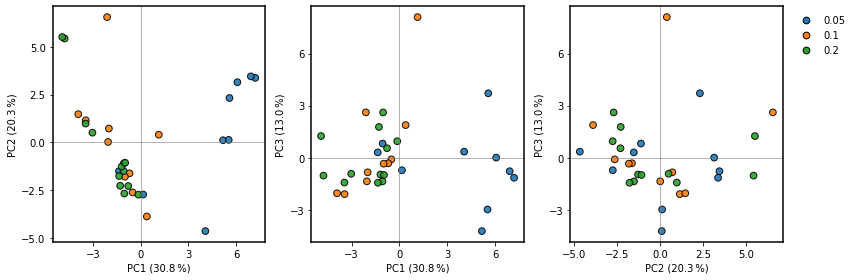

In [28]:
pca_model = pca_scatter3(ica_data.A[o2_samples.index], labels=o2_samples['Growth rate'].tolist(), scale=True, label_points=False,name='tpm_pca')


Variance explained: PC1 = 30.8 %,  PC2 = 20.3 %,  PC3 = 13.0 %


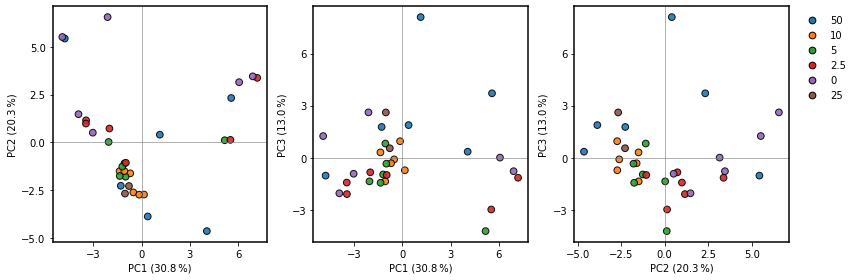

In [29]:
pca_model = pca_scatter3(ica_data.A[o2_samples.index], labels=o2_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


O2 related variance analysis

0.05 hr-1

Variance explained: PC1 = 33.6 %,  PC2 = 22.1 %,  PC3 = 16.2 %


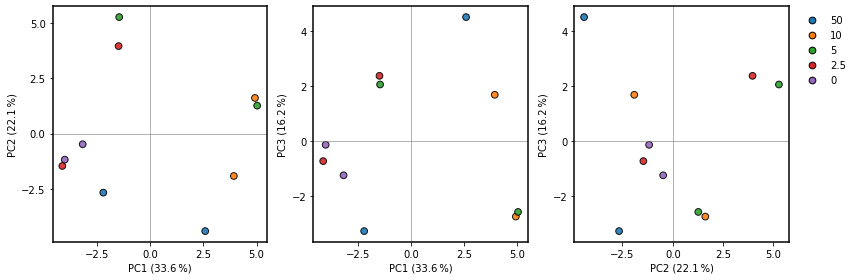

In [30]:
low_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.05'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[low_GR_samples.index], labels=low_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


0.1 hr-1

Variance explained: PC1 = 38.3 %,  PC2 = 32.4 %,  PC3 = 13.2 %


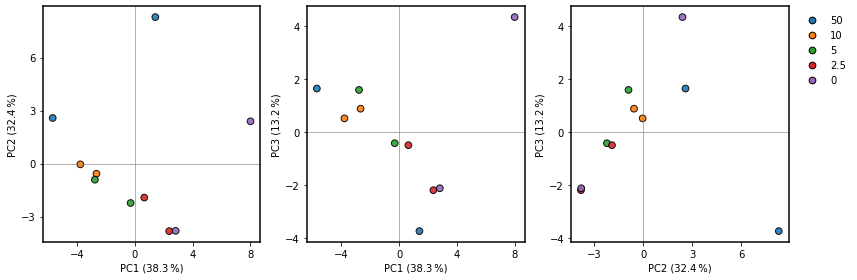

In [31]:
med_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.1'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[med_GR_samples.index], labels=med_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


0.2 hr-1

Variance explained: PC1 = 53.3 %,  PC2 = 17.5 %,  PC3 = 12.0 %


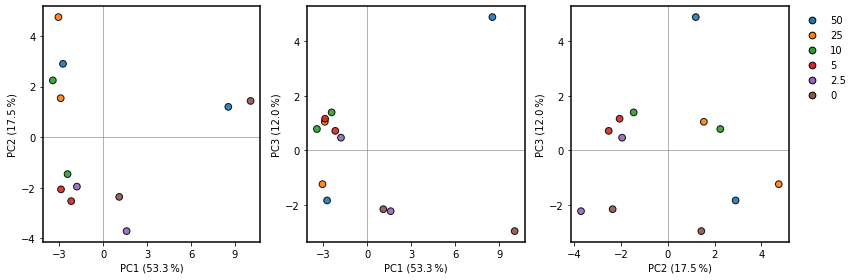

In [32]:
high_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.2'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[high_GR_samples.index], labels=high_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


In [33]:
## correlating DO 

In [34]:
low_do_samples = ica_data.sample_table[(ica_data.sample_table['project']=='O2_oscillation_0.05')]
low_do = low_do_samples['DO'].tolist()

do_df = pd.DataFrame({'DO': low_do}, index=ica_data.A[low_do_samples.index].columns)
df_merged = ica_data.A[low_do_samples.index].T.join(do_df)
low_do_df = df_merged.groupby('DO').mean().T


low_do_df = low_do_df[['0','2.5','5','10','50']]

In [35]:
df_merged

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,DO
yl_101,-13.177275,-26.031128,1.700128,-8.734035,10.578045,-9.394658,9.899250,11.702142,20.755598,-0.209707,...,-6.513782,0.456498,-3.143700,-1.895869,-3.755757,3.374814,-14.112415,-10.035113,-10.701660,50
yl_102,-3.636713,-36.662581,6.647118,-5.602090,4.634027,-22.744990,-17.583325,-3.047865,0.557392,-0.399507,...,-0.422947,-5.946533,-3.222737,-1.985675,-3.691791,4.631036,1.169130,7.501275,2.346070,50
yl_105,-0.703497,-12.659420,0.332631,-1.560595,1.121106,1.978887,-8.653421,-5.487275,-8.332138,1.713976,...,-1.876426,-2.421100,-4.516934,-0.960522,-3.992672,0.922115,2.063443,-1.678370,1.465634,10
yl_106,0.703497,12.659420,-0.332631,1.560595,-1.121106,-1.978887,8.653421,5.487275,8.332138,-1.713976,...,1.876426,2.421100,4.516934,0.960522,3.992672,-0.922115,-2.063443,1.678370,-1.465634,10
yl_107,1.016788,11.027507,-0.479921,1.210895,-4.070956,0.541603,7.348836,3.884629,9.276188,-0.140102,...,1.581946,2.571669,3.199143,2.480218,-2.717278,0.019175,-1.423074,0.465594,-2.536297,5
yl_108,0.312952,-20.370844,1.706947,-6.236946,5.124820,-2.483742,17.799220,2.892530,3.969027,-2.217802,...,12.430024,7.037209,6.275858,-4.766597,-4.899267,3.607834,-17.802000,-31.801708,3.911703,5
yl_109,-0.791029,-23.666520,2.085515,-7.643240,5.310444,-3.107082,17.318698,3.740618,5.239746,-0.784789,...,10.931586,6.270955,-0.580174,-3.662828,-3.069092,5.744815,-17.291427,-31.073492,2.292267,2.5
yl_110,-6.709957,-25.305068,6.014665,-8.156719,2.971625,-6.807278,-1.840206,16.759700,41.284853,1.470433,...,6.343922,4.362554,4.345976,-2.266309,2.446507,2.689297,-18.393945,-23.431022,4.271483,2.5
yl_111,-6.810108,-26.616327,6.218506,-7.381186,3.395835,-3.367000,4.295050,13.009986,38.561928,-0.634958,...,5.924235,5.575947,-4.058912,-3.580877,-4.765517,0.999871,-18.296424,-23.265219,4.348876,0
yl_112,-6.362991,-24.406483,4.899751,-5.714522,1.527570,1.493326,10.710478,14.918175,34.262646,2.223847,...,4.884586,3.338505,4.711992,-4.771024,-6.037440,1.868013,-16.206817,-25.050734,2.232161,0


In [36]:
# Compute Spearman correlation for each row
do_correlations = []
do_pvalues = []

for idx, row in low_do_df.iterrows():
    corr, pval = spearmanr(row.values, row.index.tolist())
    do_correlations.append(corr)
    do_pvalues.append(pval)

do_corr_df = pd.DataFrame({
    'iModulon': low_do_df .index,
    'Spearman_corr': do_correlations,
    'p_value': do_pvalues
})


do_corr_df = do_corr_df.sort_values(by='Spearman_corr', ascending=False).reset_index(drop=True)


In [37]:
row.index.tolist()

['0', '2.5', '5', '10', '50']

In [38]:
do_corr_df

,iModulon,Spearman_corr,p_value
0,22,0.9,0.037386
1,34,0.8,0.104088
2,15,0.7,0.188120
3,0,0.6,0.284757
4,33,0.6,0.284757
5,7,0.5,0.391002
6,19,0.5,0.391002
7,24,0.5,0.391002
8,4,0.5,0.391002
9,1,0.3,0.623838


In [39]:
def plot_grouped_bar_with_points(df, col, ylabel,do_col="DO", jitter=0.08, point_size=40):
    """
    df      : DataFrame containing your data; last column 'DO' groups rows
    col     : column to visualize (name or index)
    do_col  : DO column name
    jitter  : horizontal jitter for points within each bar
    point_size : scatter point size
    """
    # Resolve the column if an index was provided
    if isinstance(col, int):
        # if df columns are strings like "0","1", handle that too
        if col in df.columns:
            value_col = col
        elif str(col) in df.columns:
            value_col = str(col)
        else:
            # fallback to positional
            value_col = df.columns[col]
    else:
        value_col = col

    # Ensure DO is numeric
    df = df.copy()
    df[do_col] = pd.to_numeric(df[do_col], errors="coerce")

    # Drop rows without needed values
    df = df.dropna(subset=[value_col, do_col])

    # Compute group means (bar heights)
    means = df.groupby(do_col, sort=True)[value_col].median()

    # Prepare figure/axes
    fig, ax = plt.subplots(figsize=(5, 5))

    # X positions for each unique DO group
    do_vals = means.index.to_list()
    x = np.arange(len(do_vals))

    # Bars: mean per DO
    ax.bar(x, means.values,color='salmon')

    # Overlay points: all individual values in each DO group
    for xi, do in zip(x, do_vals):
        grp = df.loc[df[do_col] == do, value_col].values
        # jitter so points aren't stacked on exactly the same x
        xs = xi + np.random.uniform(-jitter, jitter, size=len(grp))
        ax.scatter(xs, grp, s=point_size,c='black')

        # Optional: annotate (n) above bar
        # ax.text(xi, means.loc[do], f"n={len(grp)}", ha="center", va="bottom")

    # Axis labels & ticks
    ax.set_xticks(x)
    ax.set_xticklabels([str(d) for d in do_vals], rotation=0,fontsize=12)
    ax.set_xlabel("Dissolved Oxygen (DO)",fontsize=12)
    ax.set_ylabel(ylabel,fontsize=12)
    #ax.set_title(f"Mean ± points for '{value_col}' grouped by DO")

    plt.tight_layout()
    plt.show()

    

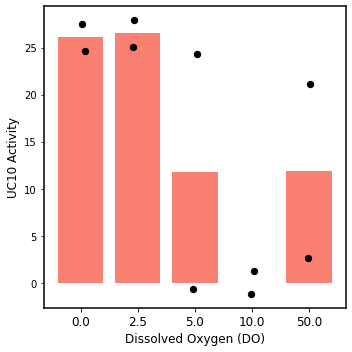

In [40]:
imod = 13
plot_grouped_bar_with_points(df_merged, imod,ica_data.imodulon_table.loc[imod]['iModulon Name']+' Activity')

In [19]:
low = [22,34,9,31,20]
mid = [19,13,35]
high = [13,36,16]

In [20]:
ica_data.view_imodulon(13)[abs(ica_data.view_imodulon(13)['gene_weight'])>0.08]

,gene_weight,accession,source,feature,start,end,score,strand,phase,attributes,...,sacc_gene_product,COG_category,Description,Preferred_name,GOs,PFAMs,KEGG_Pathway,KEGG_Module,BRITE,regulator
YALI1_A00058g,-0.168693,NC_090770.1,RefSeq,CDS,5868.0,8531.0,.,+,0,ID=cds-XP_499603.2;Parent=rna-XM_499603.3;Dbxr...,...,NaN,T,oligopeptide transporter,OPT6,"GO:0000138,GO:0000322,GO:0000323,GO:0000324,GO...",OPT,-,-,-,NaN
YALI1_A06530g,-0.095017,NC_090770.1,RefSeq,CDS,649669.0,653097.0,.,-,0,ID=cds-XP_068137762.1;Parent=rna-XM_068281661....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_A17749g,-0.118633,NC_090770.1,RefSeq,CDS,1774912.0,1776459.0,.,+,0,ID=cds-XP_500172.2;Parent=rna-XM_500172.3;Dbxr...,...,NaN,G,Major Facilitator Superfamily,-,-,MFS_1,-,-,-,NaN
YALI1_B12489g,-0.085371,NC_090771.1,RefSeq,CDS,1248934.0,1250049.0,.,+,0,ID=cds-XP_500677.3;Parent=rna-XM_500677.3;Dbxr...,...,NaN,G,Saccharomyces cerevisiae YJR107w,-,-,Lipase_3,-,-,"ko00000,ko01000",NaN
YALI1_B23522g,0.113259,NC_090771.1,RefSeq,CDS,2352220.0,2352969.0,.,+,0,ID=cds-XP_068138212.1;Parent=rna-XM_068282111....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C09260g,-0.080751,NC_090772.1,RefSeq,CDS,926004.0,926510.0,.,+,0,ID=cds-XP_501536.2;Parent=rna-XM_501536.4;Dbxr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C15610g,0.117654,NC_090772.1,RefSeq,CDS,1557702.0,1561076.0,.,-,0,ID=cds-XP_501711.3;Parent=rna-XM_501711.3;Dbxr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_C21083g,0.124238,NC_090772.1,RefSeq,CDS,2107804.0,2108349.0,.,-,0,ID=cds-XP_501849.3;Parent=rna-XM_501849.3;Dbxr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_D00376g,-0.130663,NC_090773.1,RefSeq,CDS,36050.0,37669.0,.,-,0,ID=cds-XP_502238.1;Parent=rna-XM_502238.2;Dbxr...,...,NaN,P,Belongs to the major facilitator superfamily. ...,-,-,Sugar_tr,-,-,-,NaN
YALI1_D15030g,-0.127651,NC_090773.1,RefSeq,CDS,1503029.0,1504537.0,.,+,0,ID=cds-XP_502728.3;Parent=rna-XM_502728.3;Dbxr...,...,NaN,G,to uniprot P53322 Saccharomyces cerevisiae YGR...,-,-,MFS_1,-,-,-,NaN


In [21]:
ica_data.imodulon_table

,iModulon Name,Descriptors,COGs,Category,ngenes,explained_variance,threshold,pvalue,precision,recall,f1score,TP,regulon_size,gene_set_size,qvalue,n_regs
0,RTG3,Mitochondrial retrograde,"S (Unknown), E(Amino acid transport)",Stress,108,0.004459,0.035295,0.00015608431383868843,0.046296296296296294,0.125,0.06756756756756757,5.0,40.0,108.0,0.007648131378095733,1.0
1,UC3,N.A,G(Carbohydrate transport and metabolism),Uncharacterized,394,0.013854,0.021520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GCN4,Amino acid biosynthesis,E (Amino acid transport),Metabolism,228,0.013787,0.029040,2.7095502194120287e-11,0.22807017543859648,0.07313642756680731,0.11075612353567625,52.0,711.0,228.0,2.4114996952767058e-09,1.0
3,DAL81,Ammonia degradation/Nitrogen related,E (Amino acid transport),Metabolism,131,0.024226,0.032645,4.471409016562623e-07,0.04580152671755725,0.3,0.07947019867549668,6.0,20.0,131.0,3.2194144919250886e-05,1.0
4,UC7,"Malate synthase, PCK, FTR1",S (Unknown),Uncharacterized,105,0.005453,0.038097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UC18,N.A,"G(Carbohydrate transport and metabolism), T(Si...",Uncharacterized,119,0.006332,0.032757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UC9,N.A,S (Unknown),Uncharacterized,196,0.166861,0.027916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SWI5,D (Cell cycle control),D (Cell cycle control),Cell division,80,0.017075,0.041429,2.956025509236294e-07,0.0625,0.3125,0.10416666666666667,5.0,16.0,80.0,1.50757300971051e-05,1.0
8,UC19,N.A,N.A,N.A,0,0.033613,0.120962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,UC6,N.A,C (Energy Production and Conversion),Uncharacterized,218,0.002002,0.024372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
ica_data.sample_table

,File name,condition,project,reference_condition,Strain,Mode of operation,Media,Limitation,C-source,Growth rate,DO,pH,Temperature,Read1,Read2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_replicate_correlations
yl_001,20210204-YL-CN-1,Glucose_Nlimit,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft-N limited,Nitrogen,Glucose,0.3,High,6,30,ylipolytic2025_repeat/20210204-YL-CN-1A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-CN-1A_2.fq.gz,True,True,True,Batch_Shaken:Glucose_Nlimit,True
yl_002,20210204-YL-CN-2,Glucose_Nlimit,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft-N limited,Nitrogen,Glucose,0.3,High,6,30,ylipolytic2025_repeat/20210204-YL-CN-2A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-CN-2A_2.fq.gz,True,True,True,Batch_Shaken:Glucose_Nlimit,True
yl_003,20210204-YL-fill-1,Glucose_lowDO,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft,Carbon,Glucose,0.3,Low,6,30,ylipolytic2025_repeat/20210204-YL-fill-1A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-fill-1A_2.fq.gz,True,True,True,Batch_Shaken:Glucose_lowDO,True
yl_004,20210204-YL-fill-2,Glucose_lowDO,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft,Carbon,Glucose,0.3,Low,6,30,ylipolytic2025_repeat/20210204-YL-fill-2A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-fill-2A_2.fq.gz,True,True,True,Batch_Shaken:Glucose_lowDO,True
yl_005,20210204-YL-ref-1,Glucose_shaken_reference,Batch_Shaken,Glucose_shaken_reference,W29,Shaken culture,Delft,Carbon,Glucose,0.3,High,6,30,ylipolytic2025_repeat/20210204-YL-ref-1A_1.fq.gz,ylipolytic2025_repeat/20210204-YL-ref-1A_2.fq.gz,True,True,True,Batch_Shaken:Glucose_shaken_reference,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yl_096,PD017 A3 S05 #2,µ0.2_DO5,O2_oscillation_0.2,µ0.2_DO10,W29,Continuous,Delft,Carbon,Glucose,0.2,5,6,30,ylipolytic2025_repeat/PD017A3S051A_1.fq.gz,ylipolytic2025_repeat/PD017A3S051A_2.fq.gz,True,True,True,O2_oscillation_0.2:µ0.2_DO5,True
yl_097,PD017 A3 S06 #1,µ0.2_DO2.5,O2_oscillation_0.2,µ0.2_DO10,W29,Continuous,Delft,Carbon,Glucose,0.2,2.5,6,30,ylipolytic2025_repeat/PD017A3S052A_1.fq.gz,ylipolytic2025_repeat/PD017A3S052A_2.fq.gz,True,True,True,O2_oscillation_0.2:µ0.2_DO2.5,True
yl_098,PD017 A3 S06 #2,µ0.2_DO2.5,O2_oscillation_0.2,µ0.2_DO10,W29,Continuous,Delft,Carbon,Glucose,0.2,2.5,6,30,ylipolytic2025_repeat/PD017A3S061A_1.fq.gz,ylipolytic2025_repeat/PD017A3S061A_2.fq.gz,True,True,True,O2_oscillation_0.2:µ0.2_DO2.5,True
yl_099,PD017 A3 S07 #1,µ0.2_DO0,O2_oscillation_0.2,µ0.2_DO10,W29,Continuous,Delft,Carbon,Glucose,0.2,0,6,30,ylipolytic2025_repeat/PD017A3S062A_1.fq.gz,ylipolytic2025_repeat/PD017A3S062A_2.fq.gz,True,True,True,O2_oscillation_0.2:µ0.2_DO0,True


In [ ]:
from plotting import *



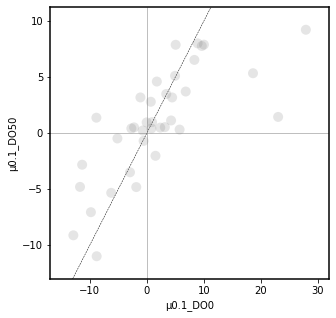

In [48]:
ax,df_diff = plot_dima_local(ica_data,'O2_oscillation_0.1:µ0.1_DO0','O2_oscillation_0.1:µ0.1_DO2.5',color_inputs='royalblue',xlabel_to_plot='µ0.1_DO0',ylabel_to_plot='µ0.1_DO50');
ax.figure.set_size_inches(5, 5)
